## Discrete Random Variable
**Definition**: RV that takes in finite set of countable infinite set of values
### Notations
$(\Omega, F, P)$ - probability space

**Definition**: A random varaible X is a function $X:\Omega \rightarrow R$, that is F-measurbale, that is $\{X \leq a \} \in F , \ \forall a \in R$

### Probability Mass Function
$P(X = X_i)$, for all possible value of X

**Example**: Roll two fair dice. The result will be denoted as X and Y. The set of possible values are 1,..., 6

Some Popular Random Variables: Z, U, V
$$Z = X + Y$$
- Set of possible values for Z: 2,..., 12

$$U = \frac{X+Y}{2}$$


$$V = \frac{1}{2} (X^2 + Y^2)$$


p.m.f: $P_z(3) = P(Z = 3) = \frac{\text{combo to make 3}}{36} = \frac{2}{36}$

### Bernoulli trials and distribution

**Trials**: A Bernoulli trial is an experiment with exactly two possible outcomes, called "success" and "failure". In a sequence of Bernoulli trials, each trial has the same probability of success and each trial is independent of one another.


**Distribution**:

$$P(x = k) = {n \choose k} p^k (1 - p)^{n - k}, k = 0...n$$

Where:
- **n** is the number of trials
- **k** is the number of successes
- **p** is the probability of success on a single trial
-**P(x = k)**: is the probability of exactly
k successes in n trials

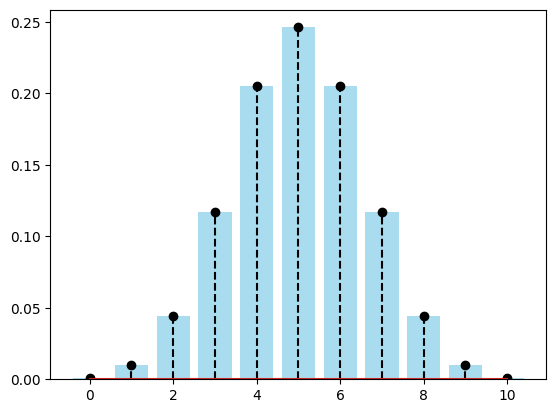

In [4]:
import math
import matplotlib.pyplot as plt

def fact(n):
  if n == 0:
    return 1
  elif n == 1:
    return 1
  else:
    return n * fact(n - 1)

def comb(n, k):
    res = lambda n, k: fact(n) / (fact(k) * fact(n - k))
    return float(res(n,k))

def ber(n, K, p):
  return [comb(n, k) * p**k * (1 - p)**(n - k) for k in range(K+1)]


def plot_pmf(n, p, K=None):
    if not K:
      K = n
    pmf_values = ber(n, K, p)
    plt.bar(list(range(K + 1)), pmf_values, alpha=0.7, color='skyblue')
    plt.stem(list(range(K + 1)), pmf_values, linefmt='k--', markerfmt='ko')
plot_pmf(10, 0.5) # notice how the highest mass center at n*p

### Geometric Dsitribution
**Definition**: An infinite seqeunce of bernouli trials

Let X be the number representing first trial that is a sucesss
- FFFSFSSF
- `X: 3`

Let Y be the number of failures beofre the first sucess
- FFFSFSSF
- `Y: 4`


Relationship of `X` to `Y`: $Y = X - 1$


**Example**: Roll a die **`20 times`**. What is the probability that **`5 dots`** occur **`exactly 3 times`**. What is the probability that **`5 dots`** will occur **`at least 3 times`**

$\text{P = porbability of sucess = 1 / 6 = P(5)}$

$X = \text{number of successes}$

$N - \text{sample times} (20)$

$$P(X = 3) = {20 \choose 3}\frac{1}{6}^3\frac{5}{6}^{17}$$

$$P( X \geq 3) = 1- P(X < 3) = 1- (P(X=2) + P(X=1) + P(X = 0))$$


In [14]:
# needed for at least 3 times
def compute_les(n, K, p):
  leq = ber(n, K, p)  # return K,..., 0 bernous trials as list
  return leq
def p_x_geq(n, K, p):
  return 1 - compute_les(n, K, p)[-1]

# exactly 3 times
geo = ber(20, 3, 1/6)
print('P(X = 3):', geo[-1])

# greater than
geq_3 = p_x_geq(20, 3, 1/6)
print('P(X >= 3):', geq_3)

# check for X < 3
print(compute_les(20, 3, 1/6))

P(X = 3): 0.23788656613785025
P(X >= 3): 0.7621134338621498
[0.02608405330458885, 0.10433621321835539, 0.19823880511487524, 0.23788656613785025]


## Continuos Random Variable
**Intuition**: continous rv deals with uncountable  numbers (e.g., fraction of an event X)

**Example**: on the sample space Omega of 0,1 (c,d)
- $P([a,b]) = b - a, \text{ where } 0  \leq a \leq b \leq 1$
- $P(a) = 0; a = b \rightarrow P([a,b]) = b - a = 0$
- **Note**: a range is always needed to be defined

**Example**: given  there is a c,d of [0,10], you want to find
$$P( 1 \leq X \leq 2 || 5 \leq X \leq7 )$$

Ans:
$$\rightarrow \frac{(2-1) + (7 -5)}{10}$$


**Example**: Suppose that (X,Y) is uniform in [0,4]^2. FInd P(Y > X+1)

Ans:
$$\rightarrow Y = X+1 = ((4-1)*3 / 2)/ 4^2$$
- **Note**: the expression is calculating the traingular area bounded by 4-square and y = x + 1

## PMF and PDF
**`Probability Density Function`**: used for discrete random variable

**`Probability Mass Function`**: used for continuos random variable

A function $f: \mathbb{R} \rightarrow \mathbb{R}$ is pdf if

i. $f(x)  \geq 0  \ \forall x$

ii. $\int^{\infty}_{-\infty} f(x) dx = 1$

$$P(a \leq X \leq b) = \int^b_a f(x) dx$$

$$P(X = a) = 0 = P(X=b)$$

### Example
We say that X is uniform of \[a,b], U\[a,b], $- \infty <a < b < \infty$


$$f(x) =
\begin{cases}
\frac{1}{b-a} & \text{ for } a < x < b \\
0 & \text{ otherwise}
\end{cases}
$$

**Note**:
- notice that as b - a is bounded by [0,1] if we are speaking in probability sense

### Example
We say that X is exponential with paramertize $\lambda > 0$ (exp($\lambda$)) if

$$f(x) =
\begin{cases}
\lambda e^{-\lambda x} & \text{ for } x > 0 \\
0 & \text{ otherwise}
\end{cases}
$$

$$\int^{\infty}_{-\infty}f(x) dx = \int^{\infty}_{0}\lambda e^{-\lambda x} dx = - e^{-\lambda x}|^\infty_0 = 0 - (- 1) = 1$$

---
## CDF
For any random variable (discrete or continous), the **cumulative distribution function** (CDF) is defined by


$$F(t) = P(X \leq t) \ \text{ for } -\infty <t < \infty$$
$$F(-\infty) = 0$$

$$F(\infty) = 1$$


$F(t)$ is a non-decreasing

### Example
Suppose that X is uniform on \[a,b]

If F(x) is CDF and F'(x) exists then


$$F'(x) = f(x)$$
$$F(t) = \int^{t}_{-\infty} f(x)dx = P(X \leq t)$$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, List

def compute_pdf(f: Callable[[float], float], a: float, b: float, x_range: List[float]) -> List[float]:
  pass

def compute_cdf(f: Callable[[float], float], a: float, b: float, x_range: List[float]) -> List[float]:
  pass


## Example
X is exponential exp(lambda)

$$PDF: f(x) = \lambda e^{-\lambda x} \ \text{ for } x \geq 0$$


$$CDF: F(x) = P(X \leq t) = \int^{t}_{\infty} f(x)dx = \int^t_0 \lambda e^{-\lambda x} dx = -e^{-\lambda x}|^t_0 = -e^{-\lambda t} - (-1) = 1 - e^{-\lambda t}$$


In [ ]:
x_list = [...]
lambda_ = int
f = lambda x, lambda_: lambda_*np.exp(-lambda_*x)
input = f(x_list)
a, b = float, float
cdf_val = compute_cdf(input, a, b, x_list)
pdf_val = compute_pdf(input, a, b, x_list)
plt.plot(cdf_val)
plt.plot(pdf_val)

$$P(X \leq t) = 1 - e^{-\lambda t}$$


$$P(X > t) = e^{-\lambda t}$$

Consider 0 < s < t

$$P(X > t +s | X > s) = \frac{P(X > t + s \text{ and } X> s)}{P(X > s)}$$


$$ = \frac{P(X> t + s)}{P(X > s)} = \frac{e^{-\lambda(t+s)}}{e^{-\lambda s}} = e^{-\lambda t} = P(X> t)$$

$$P(X > t + s| X > s) = P(X > t)$$


Exponential is a memoryless distribution

### Example: PDF = f(x) = c(1+x^2 + x^4) for x leq x leq 1

Find c

By definition

$$\int^{\infty}_{-\infty} f(x) dx = 1$$


$$\int^1_0 c(1+x^2 + x^4)dx = c(1 + 1/3 + 1/ 5) = 1$$

$$c(23/15) = 1 \rightarrow c = 15/ 23$$

$$f(x) = \frac{15}{23}(1+x^2 + x^4) \text{ for } 0 \leq x \leq 1$$

## Expectation
**Definition**: If X is discrete then its expectation is

$$E(X) = \sum_x x \cdot P(X = x)$$

else if your X is continous


$$E(X) = \int^{\infty}_{-\infty} x \cdot f(x) cd$$
- note: f(x) is the pdf

### Expected value
Example: Roll a die. X denotes the number of dots

$$
E(X) = 1/6 \cdot 1 + 1/ 6 \cdot 2 + 1/6 \cdot 3 + 1/6 \cdot 4 + 1/6 \cdot 5 + 1/6 \cdot 6
$$

**Note**: notice how the expected value is not consistent to our `expectation`

### Properties of expectation

$$E(a + bX) = a + bE(X)$$

$$E(X + Y) = EX + EY$$

$$
E(X_1+...+X_n) = E(X_1) + E(X_2) + ... + E(X_n)
$$

Example: Suppose that $X_1, X_2, ...X_n$ are i.i.d (independent identically distributed)

$$E(X_1 + X_2 +...+X_n) = EX_1 + ... + EX_n = n \cdot E_{i}$$

$$E((X_1 + X_2 +...+X_n)/n) = E_{i}$$

### Law of Large Numbers
$$
\frac{X_1 + X_2 +...X_n}{n} \rightarrow EX_1, \text{ when } n \rightarrow \infty
$$

$X_1 + X_2 +... + X_n \approx n\cdot EX_1$

### Example: X_1 - Bern Random Variable  (p)
$$P(X_1 = 1) = p, P(X_1 = 0) = 1 - p$$

$$X_1, X_2, ..., X_n \text{ - IID Bernoulli (p) }$$

$S_n$ is binomial (n, p)

$$
P(S_n = k) = {n \choose n} p^k (1 - p)^{n - k}, k = 0,..., n
$$

$$
E(S_n) = \sum^{n}_{k = 0}k \cdot P(S_n = k) = \sum^{n}_{k = 0} k { n \choose k} (1 - p)^{n - k}
$$

$$
EX_1 = 1 \cdot p + 0(1 - p) = p
$$

$$
E(S_n) = E(X_1 +... + X_n) = n E(X) = n \cdot p
$$

### Example: X - geometric (p)
Expectation by deriative (obtain moment)
$$P(X = k) = q^{k - 1}p , k = 1,2,3...$$

$$
E(X) = \sum^{\infty}_{k = 1}k q^{k - 1}p = p\sum^{\infty}_{k = 1} k q^{k - 1}
$$


**Note**:
- by defintion, geometric series is 1/ (1 - r) = sum(r^k)




